In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px 

In [13]:
SDB = sqlite3.connect('Auto2.db')
Cs = SDB.cursor()

sql="""select * from Autopliuslt;"""
df_with_dubs = pd.read_sql_query(sql, con=SDB)
df = df_with_dubs.drop_duplicates()
df.head()

,ID,Marke,Modelis,Kaina,Rida,Variklis,Kuras,PavaruDeze,VarantiejiRatai,BaterijosTalpakWh,...,Ilgis,Aukstis,TechApžiuraIki,COemisijagkm,EuroStandartas,TarsosMokestis,SDK,KlimatoValdymas,SedimosVietos,Ratlankiai
0,A26837939,BMW,428 Gran Coupe,18 000,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Automatinė,Visi varantys (4х4),None,...,None,None,None,~ 147 g/km,None,~ 40.47 €,None,Klimato kontrolė,5,None
1,A26842557,Volkswagen,Golf,7 100,314 086 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Automatinė,Priekiniai,None,...,None,None,None,104 g/km,Euro 5,0 €,AHETH...\n Rodyti,Klimato kontrolė,5,R16
2,A26862175,Fiat,500X,10 500,126 211 km,"2360 cm³, 177 AG (130kW)",Benzinas / dujos,Automatinė,Visi varantys (4х4),None,...,None,None,2026-10,None,None,None,None,Oro kondicionierius,5,R18
3,A25949486,Skoda,Octavia,2 500,318 000 km,"1896 cm³, 105 AG (77kW)",Dyzelinas,Mechaninė,Priekiniai,None,...,None,None,2025-09,135 g/km,None,40.47 €,RKPNP...\n Rodyti,Oro kondicionierius,5,None
4,A26858421,BMW,525,4 499,270 000 km,"2500 cm³, 197 AG (145kW)",Dyzelinas,Automatinė,Galiniai,None,...,None,None,2025-06,171 g/km,None,202.35 €,FFNAC...\n Rodyti,Oro kondicionierius,5,R17


In [10]:
df.columns

Index(['ID', 'Marke', 'Modelis', 'Kaina', 'Rida', 'Variklis', 'Kuras',
       'PavaruDeze', 'VarantiejiRatai', 'BaterijosTalpakWh',
       'ElektraNuvažiuojamasAtstumas', 'Ikraunamas', 'Defektai', 'Spalva',
       'KebuloTipas', 'Vairas', 'VidutinesSanaudos', 'MiesteSanaudos',
       'UzmiestyjeSanaudos', 'PirmaRegistracija',
       'PirmosiosRegistracijosSalis', 'BendrojiMase', 'NuosavaMase',
       'DuruSkaicius', 'KebuloNr', 'Ilgis', 'Aukstis', 'TechApžiuraIki',
       'COemisijagkm', 'EuroStandartas', 'TarsosMokestis', 'SDK',
       'KlimatoValdymas', 'SedimosVietos', 'Ratlankiai'],
      dtype='object')

In [24]:
def rida(x):
    if x != 'None':
        return int(x.replace(' ', '').replace('km', ''))
    else:
        return 'None'
        

def kaina(x):
    if x != 'None':
        return int(x.replace(' ', ''))

def amzius(x):
    if x != 'None':
        return int(2024 - int(x[:4]))

def galia(x):
    if 'kW' in x:
        return int(x.split('(')[-1][:-3])
    else:
        return 'None'
    
df['price'] = df['Kaina'].apply(kaina)
df['amzius'] = df['PirmaRegistracija'].apply(amzius)
df['rid'] = df['Rida'].apply(rida)
df['galia'] = df['Variklis'].apply(galia)
df.head()



,ID,Marke,Modelis,Kaina,Rida,Variklis,Kuras,PavaruDeze,VarantiejiRatai,BaterijosTalpakWh,...,TarsosMokestis,SDK,KlimatoValdymas,SedimosVietos,Ratlankiai,price,amzius,rid,galia,R5000
0,A26837939,BMW,428 Gran Coupe,18 000,199 000 km,"1997 cm³, 245 AG (180kW)",Benzinas,Automatinė,Visi varantys (4х4),None,...,~ 40.47 €,None,Klimato kontrolė,5,None,18000.0,9.0,199000,180,200000.0
1,A26842557,Volkswagen,Golf,7 100,314 086 km,"1598 cm³, 105 AG (77kW)",Dyzelinas,Automatinė,Priekiniai,None,...,0 €,AHETH...\n Rodyti,Klimato kontrolė,5,R16,7100.0,10.0,314086,77,315000.0
2,A26862175,Fiat,500X,10 500,126 211 km,"2360 cm³, 177 AG (130kW)",Benzinas / dujos,Automatinė,Visi varantys (4х4),None,...,None,None,Oro kondicionierius,5,R18,10500.0,8.0,126211,130,130000.0
3,A25949486,Skoda,Octavia,2 500,318 000 km,"1896 cm³, 105 AG (77kW)",Dyzelinas,Mechaninė,Priekiniai,None,...,40.47 €,RKPNP...\n Rodyti,Oro kondicionierius,5,None,2500.0,14.0,318000,77,320000.0
4,A26858421,BMW,525,4 499,270 000 km,"2500 cm³, 197 AG (145kW)",Dyzelinas,Automatinė,Galiniai,None,...,202.35 €,FFNAC...\n Rodyti,Oro kondicionierius,5,R17,4499.0,16.0,270000,145,270000.0


In [15]:
df['R5000'] = df[df['rid'] != 'None']['rid'].apply(lambda x: int(np.ceil(x/5000) * 5000))

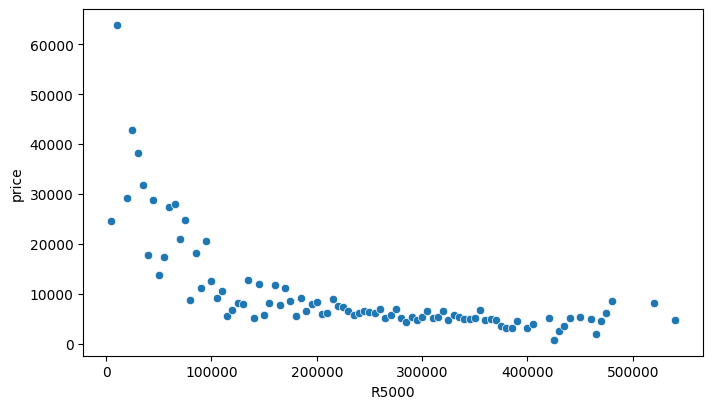

In [18]:
df_rid_gr = df[['R5000', 'price']].groupby('R5000').mean(numeric_only=True).reset_index()
fig, ax = plt.subplots(figsize=(8, 4.5))

sns.scatterplot(data=df_rid_gr, x=df_rid_gr['R5000'], y=df_rid_gr['price'])
plt.show()


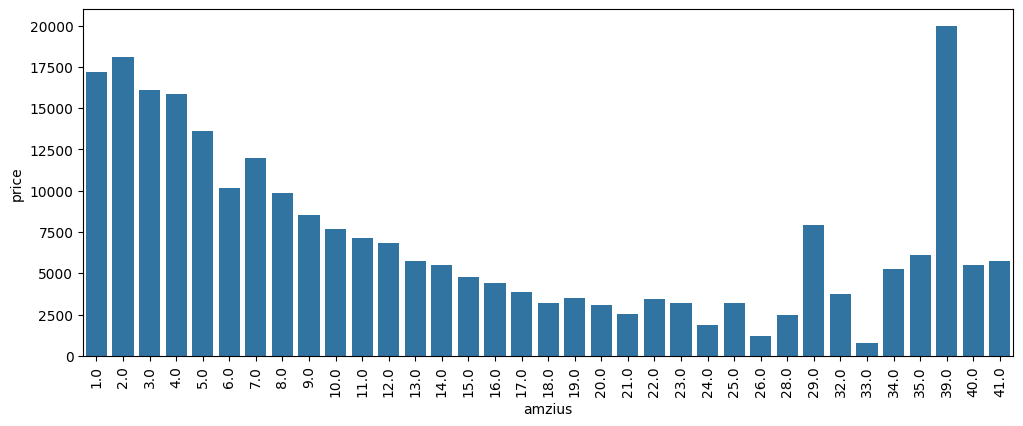

In [34]:
df_amz_gr = df[['amzius', 'price']].groupby('amzius').mean(numeric_only=True).reset_index()
# df.groupby('amzius').mean(numeric_only=True).reset_index()
fig, ax = plt.subplots(figsize=(12, 4.5))

sns.barplot(data=df_amz_gr, x=df_amz_gr['amzius'], y=df_amz_gr['price'])
# sns.barplot(data=df, x=df['amzius'], y=df['price'])
ax.tick_params(axis='x', rotation=90)
# for container in ax.containers:
#     ax.bar_label(container)
plt.show()


In [39]:
df.columns

Index(['ID', 'Marke', 'Modelis', 'Kaina', 'Rida', 'Variklis', 'Kuras',
       'PavaruDeze', 'VarantiejiRatai', 'BaterijosTalpakWh',
       'ElektraNuvažiuojamasAtstumas', 'Ikraunamas', 'Defektai', 'Spalva',
       'KebuloTipas', 'Vairas', 'VidutinesSanaudos', 'MiesteSanaudos',
       'UzmiestyjeSanaudos', 'PirmaRegistracija',
       'PirmosiosRegistracijosSalis', 'BendrojiMase', 'NuosavaMase',
       'DuruSkaicius', 'KebuloNr', 'Ilgis', 'Aukstis', 'TechApžiuraIki',
       'COemisijagkm', 'EuroStandartas', 'TarsosMokestis', 'SDK',
       'KlimatoValdymas', 'SedimosVietos', 'Ratlankiai', 'price', 'amzius',
       'rid', 'galia', 'R5000'],
      dtype='object')

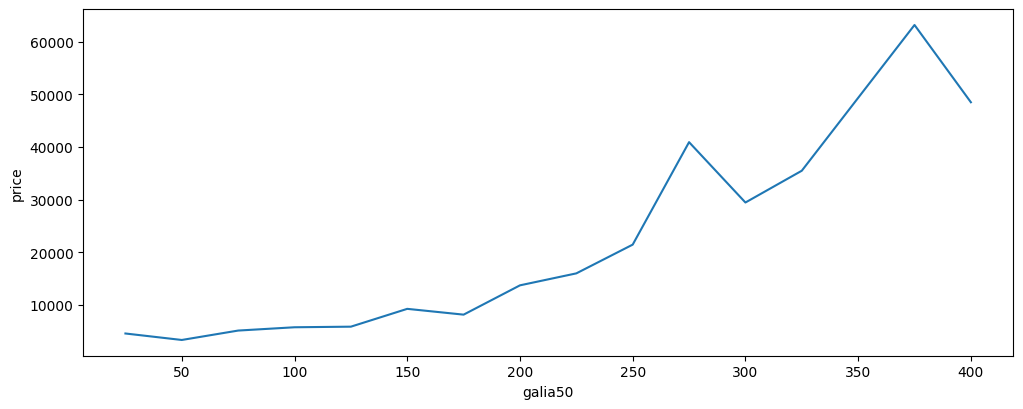

In [43]:
df['galia50'] = df[df['galia'] != 'None']['galia'].apply(lambda x: (np.ceil(x/25) * 25))
df_galia_gr = df[['galia50', 'price']].groupby('galia50').mean(numeric_only=True).reset_index()


fig, ax = plt.subplots(figsize=(12, 4.5))

sns.lineplot(data=df_galia_gr, x=df_galia_gr['galia50'], y=df_galia_gr['price'])
# sns.barplot(data=df, x=df['amzius'], y=df['price'])
# ax.tick_params(axis='x', rotation=90)
# for container in ax.containers:
#     ax.bar_label(container)
plt.show()

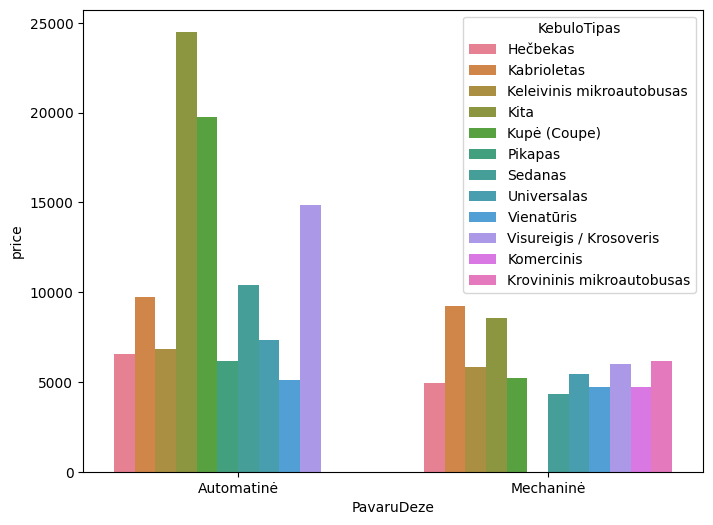

In [84]:
# dfpopgamintojai = df[df['gamintojas'].isin(top10)]
df_tipas = df[(df['PavaruDeze'] != 'None')][['PavaruDeze', 'KebuloTipas', 'price']]
df_tipas_gr = df_tipas.groupby(['PavaruDeze', 'KebuloTipas']).mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df_tipas_gr, x='PavaruDeze', y='price', hue='KebuloTipas')

# ax.tick_params(axis='x', rotation=90)
# for container in ax.containers:
#     ax.bar_label(container)
plt.show()
